In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder;
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel ("HW_Data_Set.xlsx")
df = data.copy()

In [3]:
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 136 entries, ind_5 to 90_target
dtypes: float64(88), int64(45), object(3)
memory usage: 6.4+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ind_5,6167.0,-0.803146,23.624403,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_6,6167.0,-0.803470,23.624144,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_8,6167.0,48.388890,36.388526,0.000000,14.285714,50.000000,85.714286,100.000000
ind_9,6167.0,48.289282,36.478009,0.000000,14.285714,50.000000,85.714286,100.000000
ind_10,6167.0,0.099609,60.414625,-100.000000,-50.000000,0.000000,57.142857,100.000000
...,...,...,...,...,...,...,...,...
ind_426,6167.0,0.498188,0.228547,0.000000,0.323783,0.495192,0.675730,1.000000
ind_428,6167.0,0.490174,0.150483,0.083530,0.379894,0.487078,0.601508,0.868534
20_target,6167.0,-0.057102,14.834497,-15.780588,-15.350354,0.000000,15.385945,15.768767
50_target,6167.0,-2.906358,34.559778,-37.142889,-36.208094,-34.267756,35.879524,37.038694


In [6]:
df.shape

(6167, 136)

In [7]:
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [8]:
df.isnull().values.any()

False

In [9]:
num_deg = []
kat_deg = []

for col in df:
    if(df.dtypes[col] == "object"):
        kat_deg.append(col)
    else:
        num_deg.append(col)

kat_deg

['ind_109', 'ind_420', 'ind_422']

In [10]:
for i in kat_deg:
    print(i,": ",df[i].value_counts().count())

# Kategorik verilerde kaç farklı kategori olduğuna baktım

ind_109 :  2
ind_420 :  582
ind_422 :  573


# Dummy

In [146]:
dms = pd.get_dummies(df[['ind_109']])
dms.head()

,ind_109_GREEN,ind_109_RED
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [147]:
df = df.drop(["ind_109", "50_target", "90_target"], axis = 1)

In [148]:
df = pd.concat([df, dms[["ind_109_GREEN"]]], axis = 1)

In [149]:
df["ind_420"] = df["ind_420"].replace("?", np.nan)
df["ind_422"] = df["ind_422"].replace("?", np.nan)

In [150]:
df.isnull().sum().sum()

2082

In [151]:
df = df.dropna(axis=0, subset=["ind_420","ind_422"])

In [152]:
df.isnull().sum().sum()

0

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5126 entries, 0 to 6166
Columns: 134 entries, ind_5 to ind_109_GREEN
dtypes: float64(88), int64(45), uint8(1)
memory usage: 5.2 MB


In [154]:
X = df
X.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,ind_109_GREEN
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,2.0,-49.6,-54,-152.0,-353.0,1.0,0.498547,0.701906,15.135802,1
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.8,-55.6,-60,-158.0,-359.0,1.0,0.537088,0.690833,15.143348,1
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,2.7,-58.4,-60,-160.0,-362.0,1.0,0.615169,0.693040,15.146870,1
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.9,-61.8,-65,-166.0,-367.0,1.0,0.661517,0.673418,15.153283,1
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.1,-79.8,-86,-186.0,-388.0,1.0,0.747204,0.700522,-15.179065,1


In [155]:
X.shape

(5126, 134)

In [157]:
X.isnull().sum().sum()

0

# PCA

In [158]:
#hocanın kendi yazdığı fonksiyon belirlenen threshold için kaç component gerektiğinin bilgisini veriyor
def pca_fon(X, threshold):
    pca = PCA()
    X_pca = pca.fit_transform(scale(X))
    arr = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)
    num_var = sum((arr < threshold*100)) + 1 
    print('pca sonrası değişken sayısı: ',num_var)
    X_pcad = pd.DataFrame(X_pca[:,0:num_var], index = X.index)
    return X_pcad

In [159]:
df_pca = pca_fon(X, 0.70)

pca sonrası değişken sayısı:  9


In [160]:
# bagımlı degişken olarak 20_target ı seçtim
y = df["20_target"]

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df.copy()
print("training", training.shape)

X_train (3844, 134)
y_train (3844,)
X_test (1282, 134)
y_test (1282,)
training (5126, 134)


In [162]:
pca = PCA()

In [163]:
X_reduced_train = pca.fit_transform(scale(X_train))

In [164]:
X_reduced_train.shape

(3844, 134)

In [165]:
X_reduced_train[0:1,:]
# 1.gözlemin tüm değişkenlerdeki değerleri

array([[-1.04534049e+01,  9.33019719e-01,  3.77724448e-01,
         2.96891671e+00, -8.61451496e-01, -1.34033530e+00,
         7.08038206e-01,  1.38962454e-01,  9.26774411e-01,
         1.92501981e-01, -6.43055357e-01, -4.34636888e-01,
        -1.15535736e-01, -3.81914007e-01, -1.15000824e+00,
        -1.41300871e+00, -1.38559245e-01,  2.06660222e+00,
         1.14993573e+00, -8.82704599e-04, -8.95343681e-01,
         2.01384709e+00,  2.08122560e-01,  1.09432529e+00,
        -5.36512825e-01, -8.29145654e-01,  1.92523433e-01,
        -3.80457542e-02,  1.59806187e-01,  1.09160789e+00,
         9.10478398e-02, -2.16168986e-01,  3.39299902e-01,
         2.38650562e-01, -6.22524016e-01, -3.00862697e-01,
         5.76766805e-01,  3.34988062e-01, -1.32978204e-03,
         8.33962239e-01,  5.30056862e-01,  9.76360761e-01,
        -2.08115726e-01, -4.84034081e-01,  1.39650227e-01,
         3.09197395e-01, -2.44319413e-01, -5.55871855e-01,
         6.19135897e-01,  3.33094503e-01,  4.35709502e-0

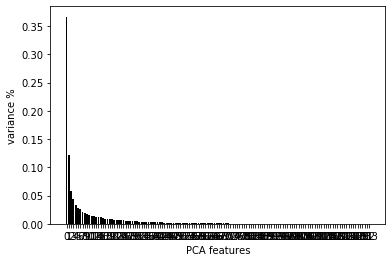

In [166]:
#componentlerin açıklama oranlarının grafiği
import matplotlib.pyplot as plt
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features);

In [167]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:15]
# veri seti içerisindeki değişkenliği açıklama oranları

array([36.68, 48.86, 54.66, 59.1 , 62.42, 65.29, 67.86, 69.87, 71.73,
       73.43, 75.02, 76.48, 77.85, 79.11, 80.32])

In [168]:
lm = LinearRegression()

In [169]:
pca_model = lm.fit(X_reduced_train, y_train)

In [170]:
pca_model.intercept_
#sabit

-0.0029135481191460873

In [171]:
pca_model.coef_[0:15]

array([-0.13467218,  0.18408379,  0.14511673,  0.05105269, -0.09413747,
       -0.24223519, -0.43818518, -0.40891702, -0.23427688, -0.84962658,
        0.87572049, -0.46230067, -0.66237652, -1.03594354, -0.97410106])

# Tahmin

In [172]:
y_pred = pca_model.predict(X_reduced_train)

In [173]:
y_pred[0:5]

array([ 14.79335039, -15.05745223, -15.41688227,  14.60822757,
       -14.50598243])

In [174]:
np.sqrt(mean_squared_error(y_train, y_pred))

2.6962688277508608e-14

In [175]:
df["20_target"].mean()

-0.022709947015215837

In [176]:
r2_score(y_train, y_pred)

1.0

In [177]:
PCA2 = PCA()

In [178]:
X_reduced_test = PCA2.fit_transform(scale(X_test))

In [179]:
y_pred = pca_model.predict(X_reduced_test)

In [180]:
np.sqrt(mean_squared_error(y_test, y_pred))

16.739043096057653

# Model Tuning

In [181]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

14.892926965357237


In [182]:
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)

In [183]:
lm = LinearRegression()

In [184]:
RMSE = []

In [185]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

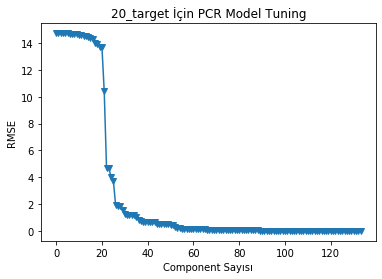

In [186]:
plt.plot(RMSE, '-v')
plt.xlabel('Component Sayısı')
plt.ylabel('RMSE')
plt.title('20_target İçin PCR Model Tuning');

In [187]:
lm = LinearRegression()

In [188]:
pcr_model = lm.fit(X_reduced_train[:,0:9], y_train)

In [189]:
y_pred = pcr_model.predict(X_reduced_train[:,0:9])

In [190]:
print(np.sqrt(mean_squared_error(y_train, y_pred)))

14.648925065782729


In [191]:
r2_score(y_train, y_pred)

0.014406869249869225

In [192]:
y_pred = pcr_model.predict(X_reduced_test[:,0:9])

In [193]:
y_pred = pcr_model.predict(X_reduced_test[:,0:9])

In [194]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

14.873988635128356


In [195]:
r2_score(y_test, y_pred)

-0.005857520347026801